20BCI7226

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Reading the csv file

df = pd.read_csv('/content/drug200.csv')

# Visualizing the 1st 5 observations

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# descriptive stat
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
# Check the null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
names=['Age','Na_to_K']

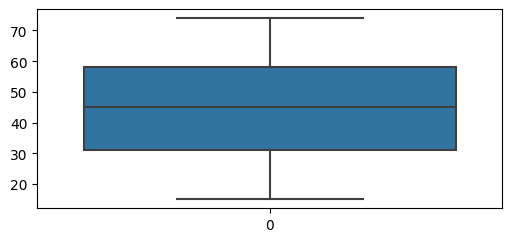

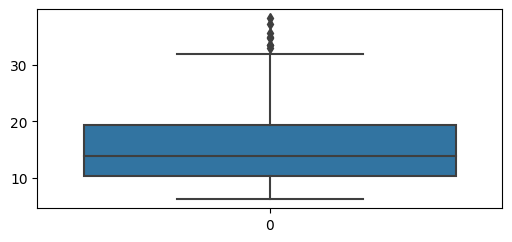

In [ ]:
for i,j in enumerate(names):
  plt.figure(figsize=(6,15))
  plt.subplot(5,1,i+1)
  sns.boxplot(df[j])

In [ ]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

In [ ]:
q1 , q3


(10.4455, 19.38)

In [ ]:
IQR = q3 - q1
IQR

8.9345

In [ ]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [ ]:
print(upper_limit)
print(lower_limit)

32.78175
-2.9562500000000007


In [ ]:
df = df[df.Na_to_K<upper_limit]

<Axes: >

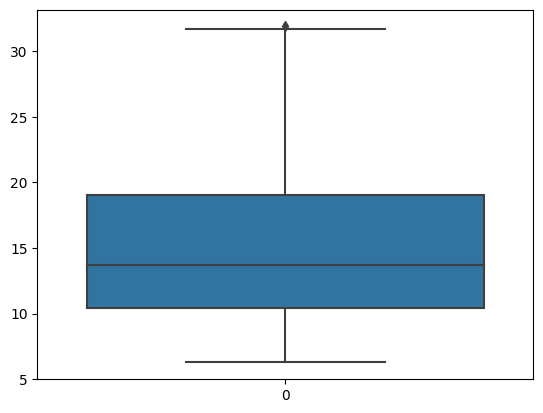

In [ ]:
sns.boxplot(df.Na_to_K)

In [ ]:
classes=df['Drug'].unique()
classes

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [ ]:
# Spliting the data

# Step-1: Split dependent and in-dependent
# Step-2: Split training and testing data

In [ ]:
x = df.iloc[:,0:5] # iloc[:,:]
x.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093


In [ ]:
y = pd.get_dummies(df.iloc[:,5:])
y

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
195,0,0,0,1,0
196,0,0,0,1,0
197,0,0,0,0,1
198,0,0,0,0,1


In [ ]:
# Split the training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # initialize the lib


In [ ]:
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtrain['Cholesterol']

42     1
25     1
8      0
41     1
164    1
      ..
3      0
135    1
139    0
160    0
76     0
Name: Cholesterol, Length: 153, dtype: int64

In [ ]:
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])
xtest['Cholesterol']

63     1
11     1
178    0
87     0
150    1
95     1
21     0
67     1
23     0
62     1
134    0
169    0
147    1
7      0
106    0
170    0
32     1
192    0
56     1
33     1
30     1
199    1
101    0
109    0
52     1
172    1
137    0
116    1
198    1
48     0
1      0
5      0
93     1
130    0
91     1
14     0
132    1
12     0
89     1
Name: Cholesterol, dtype: int64

In [ ]:
le2=LabelEncoder()
xtrain['BP'] = le2.fit_transform(xtrain['BP'])
xtrain['BP']

42     2
25     0
8      2
41     0
164    0
      ..
3      2
135    1
139    2
160    2
76     0
Name: BP, Length: 153, dtype: int64

In [ ]:
xtest['BP'] = le2.transform(xtest['BP'])
xtest['BP']

63     1
11     0
178    2
87     1
150    0
95     1
21     2
67     2
23     1
62     1
134    0
169    0
147    0
7      1
106    2
170    2
32     1
192    1
56     0
33     0
30     2
199    1
101    0
109    2
52     1
172    2
137    0
116    2
198    2
48     2
1      1
5      2
93     1
130    2
91     0
14     2
132    1
12     1
89     2
Name: BP, dtype: int64

In [ ]:
le3=LabelEncoder()
xtrain['Sex'] = le3.fit_transform(xtrain['Sex'])
xtrain['Sex']

42     1
25     0
8      1
41     0
164    1
      ..
3      0
135    1
139    0
160    0
76     0
Name: Sex, Length: 153, dtype: int64

In [ ]:
xtest['Sex'] = le3.transform(xtest['Sex'])
xtest['Sex']

63     1
11     0
178    1
87     1
150    1
95     1
21     1
67     1
23     0
62     1
134    0
169    0
147    0
7      1
106    1
170    0
32     1
192    1
56     1
33     0
30     0
199    0
101    0
109    1
52     1
172    0
137    0
116    1
198    1
48     1
1      1
5      0
93     0
130    0
91     1
14     0
132    1
12     1
89     0
Name: Sex, dtype: int64

In [ ]:
# Build an ANN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# ANN Model

model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 5)                 30        
                                                                 
 dense_40 (Dense)            (None, 26)                156       
                                                                 
 dense_41 (Dense)            (None, 32)                864       
                                                                 
 dense_42 (Dense)            (None, 64)                2112      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 26)                858       
                                                                 
 dense_45 (Dense)            (None, 5)                

In [ ]:
model.fit(xtrain,ytrain,epochs=20,batch_size=10,validation_data=(xtest,ytest))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 0.0396 - accuracy: 0.9869 - val_loss: 0.0644 - val_accuracy: 0.9744
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0340 - accuracy: 0.9935 - val_loss: 0.0302 - val_accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0614 - accuracy: 0.9739 - val_loss: 0.1028 - val_accuracy: 0.9744
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1303 - accuracy: 0.9608 - val_loss: 0.0920 - val_accuracy: 0.9487
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0758 - accuracy: 0.9804 - val_loss: 0.0980 - val_accuracy: 0.9744
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0488 - accuracy: 0.9804 - val_loss: 0.0560 - val_accuracy: 0.9744
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 0.9869 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 8/20
16/16 [=

In [ ]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 6ms/step


In [ ]:
ypred=(ypred == ypred.max(axis=1)[:,None]).astype(int)

In [ ]:
ytest.head(10)

,Drug_DrugY,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
63,0,0,0,0,1
11,1,0,0,0,0
178,1,0,0,0,0
87,1,0,0,0,0
150,0,1,0,0,0
95,0,0,0,0,1
21,1,0,0,0,0
67,0,0,0,0,1
23,1,0,0,0,0
62,1,0,0,0,0


In [ ]:
ypred[:10,:]

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [ ]:
# Task 3 : Test the model with random data

In [ ]:
random_data = np.random.rand(1, 5)
random_data

array([[0.38430996, 0.47901777, 0.53853142, 0.33450793, 0.43640932]])

In [ ]:
predictions = model.predict(random_data)
predictions

1/1 [==============================] - 0s 81ms/step


array([[0.00347125, 0.80682224, 0.07604789, 0.05053167, 0.06312693]],
      dtype=float32)

In [ ]:
predicted_class = np.argmax(predictions)
print("Predicted Drug Class :", classes[predicted_class])

Predicted Drug Class : drugC
